In [22]:
import os
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
Code = 'C,CE,CN,CW,D,DL,G,KE,KK,KY,L,LD,LH,LM,LS,MH,MN,MO,OY,RN,SO,T,W,WH,WX,WW,LK,TN,TS'.split(',')
County = 'Cork,Clare,Cavan,Carlow,Dublin,Donegal,Galway,Kildare,Kilkenny,Kerry,Limerick,Longford,Louth,Leitrim,Laois,Meath,Monaghan,Mayo,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow,County Limerick,North Tipperary,South Tipperary'.split(',')
Code_County = {}
for i,c in enumerate(Code):
    Code_County[c] = County[i]
print(Code_County)

{'C': 'Cork', 'CE': 'Clare', 'CN': 'Cavan', 'CW': 'Carlow', 'D': 'Dublin', 'DL': 'Donegal', 'G': 'Galway', 'KE': 'Kildare', 'KK': 'Kilkenny', 'KY': 'Kerry', 'L': 'Limerick', 'LD': 'Longford', 'LH': 'Louth', 'LM': 'Leitrim', 'LS': 'Laois', 'MH': 'Meath', 'MN': 'Monaghan', 'MO': 'Mayo', 'OY': 'Offaly', 'RN': 'Roscommon', 'SO': 'Sligo', 'T': 'Tipperary', 'W': 'Waterford', 'WH': 'Westmeath', 'WX': 'Wexford', 'WW': 'Wicklow', 'LK': 'County Limerick', 'TN': 'North Tipperary', 'TS': 'South Tipperary'}


numbel of training :  1740
Europe numbel of training:  1659
UK numbel of training  81


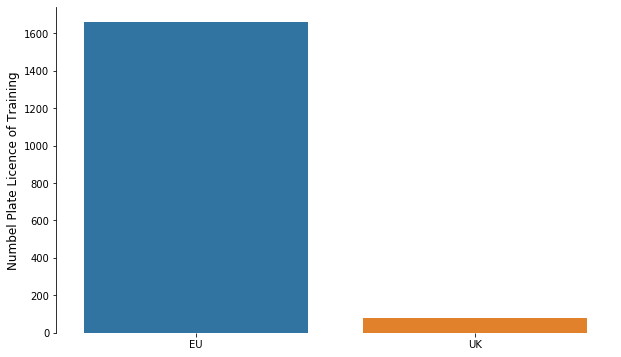

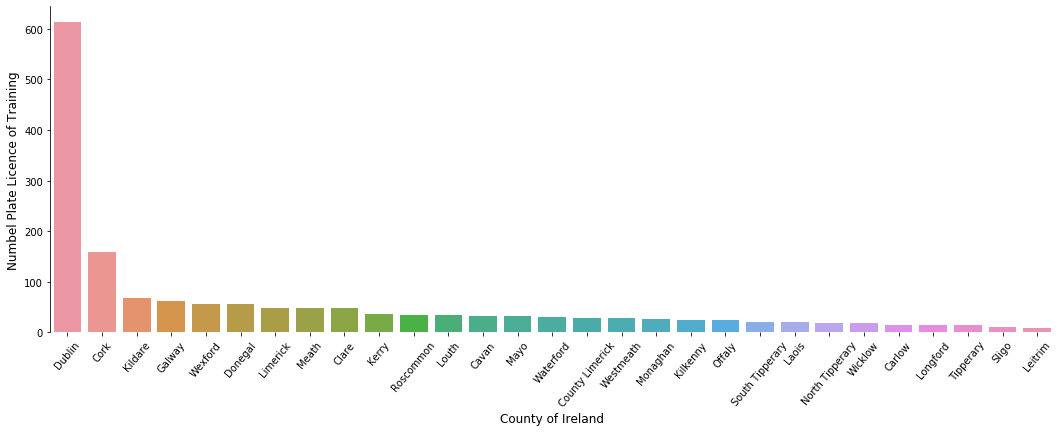

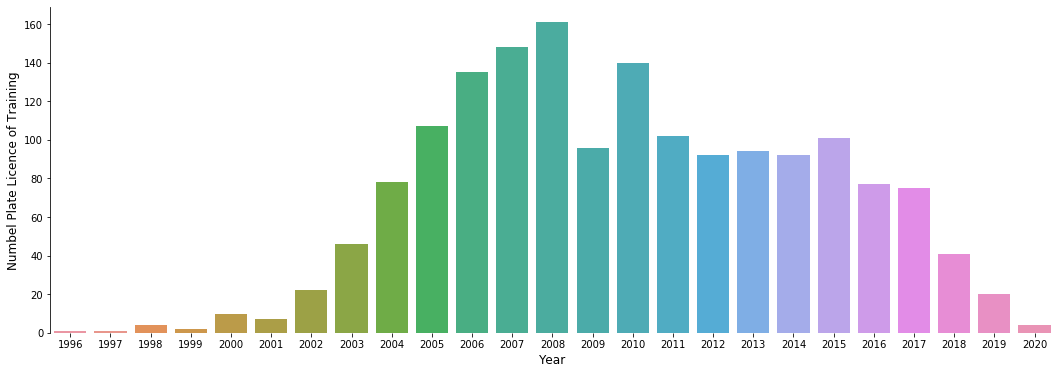

In [24]:
plate_train = os.listdir('plate_train/')
City = dict()
Eu_num = 0
Anti_Eu_num = 0
Year = dict()

for p in plate_train:
    if p[0] >= '0' and p[0] <= '9':
        year = ''
        for c in p:
            if c>='A' and c<='Z':
                break
            year += c
        if len(year) == 3:
            year = year[:2]
            year = '20' + year
        else:
            if int(year) < 13:
                year = '20' + year
            else:
                year = '19' + year
        if year < '1987':
            continue
        if year not in Year.keys():
            Year[year] = 1
        else:
            Year[year] += 1
Year = sorted(Year.items(),key = lambda x:x[0],reverse = True)
Year_name = []
Year_num = []
for i in Year:
    Year_name.append(i[0])
    Year_num.append(i[1])
        
for p in plate_train:
    if p[0] >= '0' and p[0] <= '9':
        Eu_num += 1
        city = ''
        first_part = True
        for c in p:
            if not first_part and (c>='0' and c<='9'):
                break
            elif c>='A' and c<='Z':
                city += c
                first_part = False
        if city not in City.keys():
            City[city]  = 1
        else:
            City[city] += 1
    else:
        Anti_Eu_num += 1
City = sorted(City.items(),key = lambda x:x[1],reverse = True)
City_name = []
City_num = []
for i in City:
    if i[0] not in Code_County.keys():
        continue
    City_name.append(Code_County[i[0]])
    City_num.append(i[1])

print('numbel of training : ', Eu_num+Anti_Eu_num)
print('Europe numbel of training: ',Eu_num)
print('UK numbel of training ', Anti_Eu_num)

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 12,
}

plt.figure(figsize=(10, 6))
sns.barplot(x=['EU', 'UK'], y=[Eu_num, Anti_Eu_num])
sns.despine(bottom=True)
plt.ylabel('Numbel Plate Licence of Training',font2)
plt.savefig('result_images/EU_UK_train.png',dpi=300)

plt.figure(figsize=(18, 6))
sns.barplot(x=City_name, y=City_num)
sns.despine(bottom=True)
plt.xlabel('County of Ireland',font2)
plt.xticks(rotation=50)
plt.ylabel('Numbel Plate Licence of Training',font2)
plt.savefig('result_images/County_distribution_train.png',dpi=300)

plt.figure(figsize=(18, 6))
sns.barplot(x=Year_name, y=Year_num)
sns.despine(bottom=True)
plt.xlabel('Year',font2)
# plt.xticks(rotation=50)
plt.ylabel('Numbel Plate Licence of Training',font2)
plt.savefig('result_images/Year_distribution_train.png',dpi=300)


numbel of testing :  195
Europe numbel of testing:  191
UK numbel of testing  4


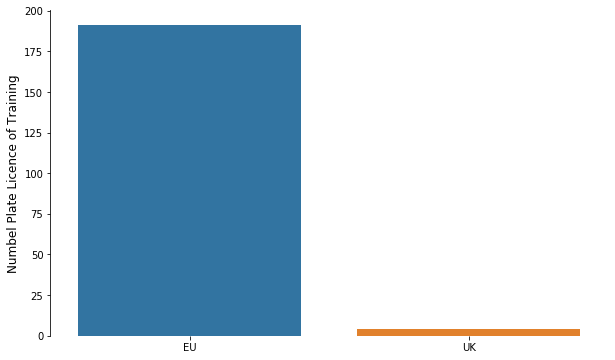

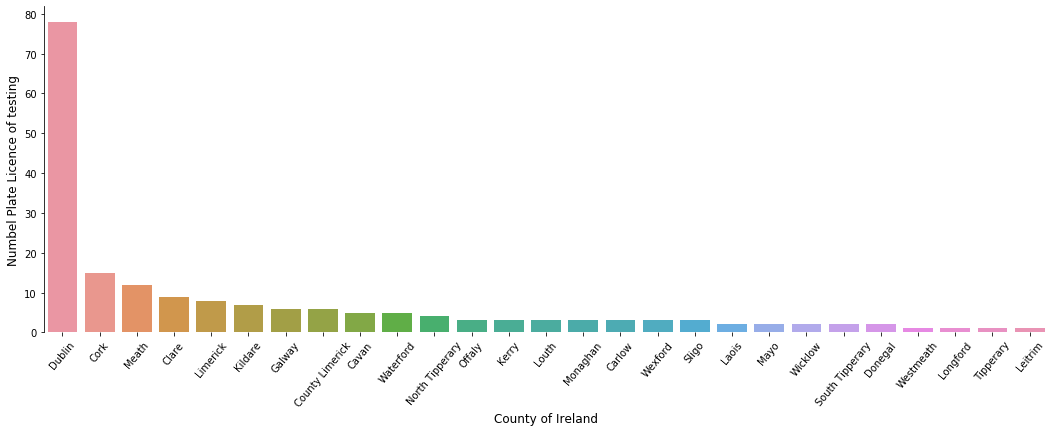

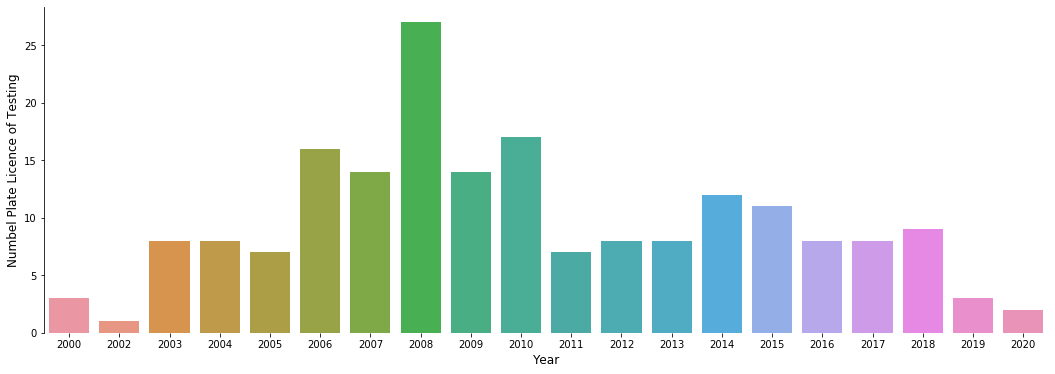

In [25]:
plate_train = os.listdir('plate_test/')
City = dict()
Eu_num = 0
Anti_Eu_num = 0
Year = dict()

for p in plate_train:
    if p[0] >= '0' and p[0] <= '9':
        year = ''
        for c in p:
            if c>='A' and c<='Z':
                break
            year += c
        if len(year) == 3:
            year = year[:2]
            year = '20' + year
        else:
            if int(year) < 13:
                year = '20' + year
            else:
                year = '19' + year
        if year < '1987':
            continue
        if year not in Year.keys():
            Year[year] = 1
        else:
            Year[year] += 1
Year = sorted(Year.items(),key = lambda x:x[0],reverse = True)
Year_name = []
Year_num = []
for i in Year:
    Year_name.append(i[0])
    Year_num.append(i[1])

for p in plate_train:
    if p[0] >= '0' and p[0] <= '9':
        Eu_num += 1
        city = ''
        first_part = True
        for c in p:
            if not first_part and (c>='0' and c<='9'):
                break
            elif c>='A' and c<='Z':
                city += c
                first_part = False
        if city not in City.keys():
            City[city]  = 1
        else:
            City[city] += 1
    else:
        Anti_Eu_num += 1
City = sorted(City.items(),key = lambda x:x[1],reverse = True)
City_name = []
City_num = []
for i in City:
    if i[0] not in Code_County.keys():
        continue
    City_name.append(Code_County[i[0]])
    City_num.append(i[1])

print('numbel of testing : ', Eu_num+Anti_Eu_num)
print('Europe numbel of testing: ',Eu_num)
print('UK numbel of testing ', Anti_Eu_num)

plt.figure(figsize=(10, 6))
sns.barplot(x=['EU', 'UK'], y=[Eu_num, Anti_Eu_num])
sns.despine(bottom=True)
plt.ylabel('Numbel Plate Licence of Training',font2)
plt.savefig('result_images/EU_UK_test.png',dpi=300)


font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 12,
}

plt.figure(figsize=(18, 6))
sns.barplot(x=City_name, y=City_num)
sns.despine(bottom=True)
plt.xlabel('County of Ireland',font2)
plt.xticks(rotation=50)
plt.ylabel('Numbel Plate Licence of testing',font2)
plt.savefig('result_images/County_distribution_test.png',dpi=300)

plt.figure(figsize=(18, 6))
sns.barplot(x=Year_name, y=Year_num)
sns.despine(bottom=True)
plt.xlabel('Year',font2)
plt.ylabel('Numbel Plate Licence of Testing',font2)
plt.savefig('result_images/Year_distribution_test.png',dpi=300)
